# Scientific processing with SciPy

> SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python.

SciPy has a number of modules, so this will be more of a whirlwind tour than an in-depth explanation of each module. 

In [4]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Polynomials

SciPy has a built-in representation of polynomials:

In [ ]:
from scipy import poly1d

In [ ]:
p = poly1d([3,4,5])
print p

In [ ]:
print p * p

## "Special" functions in `scipy.special`

SciPy provides several functions useful in mathematical physics in the `special` module. For instance, the Bessel functions are included as `jn` and `jn_zeros`:

In [ ]:
from scipy import special
def height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([height(1, 1, r, theta, 0.5) for r in radius])


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Numerical integration in `scipy.integrate`

In [ ]:
from scipy import integrate

In [ ]:
result, ub_error = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
result

In [ ]:
result, ub_error = integrate.quad(lambda x: x, 0, 4)
result

## Optimization in `scipy.optimize`

SciPy also provides a number of algorithms for optimization:

In [ ]:
p = poly1d([1,2,3])
print p

In [ ]:
xs = np.r_[-5:5:20j]
ys = p(xs)
plt.plot(xs, ys)
plt.show()

In [ ]:
from scipy import optimize

In [ ]:
result = optimize.minimize(p, [-10], method='nelder-mead')
result

We can also use the least-squares algorithm to find a curve to fit an equation so long as we can define a `residuals` and a `peval` function where:

 - `residuals(p, y, x)` returns the residuals given a parameter being optimized `p`, as well as `y` and `x`
 - `peval(x, p)` returns the `y` value given the parameter `p` and `x`

In [ ]:
from numpy import arange, sin, pi, random, array
x = arange(0, 6e-2, 6e-2 / 30)
A, k, theta = 10, 1.0 / 3e-2, pi / 6
y_true = A * sin(2 * pi * k * x + theta)
y_meas = y_true + 2*random.randn(len(x))


In [ ]:
def residuals(p, y, x):
    A, k, theta = p
    err = y - A * sin(2 * pi * k * x + theta)
    return err

def peval(x, p):
    return p[0] * sin(2 * pi * p[1] * x + p[2])


In [ ]:
# Initial guess for A, k, theta
p0 = [8, 1 / 2.3e-2, pi / 3]
array(p0)

In [ ]:
plsq = optimize.leastsq(residuals, p0, args=(y_meas, x))
plsq[0]

In [ ]:
A, k, theta

In [ ]:
plt.plot(x, peval(x, plsq[0]),x,y_meas,'o',x,y_true)
plt.title('Least-squares fit to noisy data')
plt.legend(['Fit', 'Noisy', 'True'])
plt.show()

## Interpolation

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
xs = np.r_[0:10:11j]
ys = np.cos(-xs**2/9.0)
f = interp1d(xs, ys)
f2 = interp1d(xs, ys, kind='cubic')

In [ ]:
xnew = np.r_[0:10:41j]
plt.plot(xs, ys, 'o', xnew, f(xnew), '-',xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

## Fast Fourier Transforms with `fftpack`

> PyFFTW provides a way to replace a number of functions in scipy.fftpack with its own functions, which are usually significantly faster, via pyfftw.interfaces. Because PyFFTW relies on the GPL-licensed FFTW it cannot be included in Scipy. Users for whom the speed of FFT routines is critical should consider installing PyFFTW.

In [ ]:
from scipy.fftpack import fft

In [ ]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0

In [ ]:
xs = np.r_[0.0: N*T: N * 1j]
ys = np.sin(50.0 * 2.0*np.pi*xs) + 0.5*np.sin(80.0 * 2.0*np.pi*xs)
yf = fft(ys)
xf = np.r_[0.0 : 1.0/(2.0*T) : 1j * N/2]

In [ ]:
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

## Signal processing with `scipy.signal`

In [ ]:
from scipy import misc, signal
image = misc.face(gray=True).astype(np.float32)
derfilt = np.array([1.0, -2, 1.0], dtype=np.float32)
ck = signal.cspline2d(image, 8.0)
deriv = (signal.sepfir2d(ck, derfilt, [1]) +
         signal.sepfir2d(ck, [1], derfilt))

In [ ]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

In [ ]:
plt.figure()
plt.imshow(deriv)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

## Linear algebra with `scipy.linalg`

While NumPy also has linear algebra support, `scipy.linalg` is a superset of its functionality, and is always compiled with acceleration via BLAS/LAPACK, so use `scipy.linalg` over `numpy.linalg`.

In [ ]:
from scipy import linalg

In [ ]:
A = np.array([[1,2], [3,4]])
A

In [ ]:
linalg.inv(A)

In [ ]:
A.dot(linalg.inv(A))

In [ ]:
b = np.array([[5], [6]])
b

In [ ]:
linalg.inv(A).dot(b)

In [ ]:
linalg.solve(A, b)

In [ ]:
A.dot(linalg.solve(A, b))

In [ ]:
linalg.det(A)

## Clustering with `scipy.cluster`

SciPy provides vector quantization (vq) and hierarchical clustering routines as well in the `cluster` package.

In [ ]:
N = 50
mean_0 = [5, 8]
size_0 = [1, 1]
mean_1 = [-1, -1]
size_1 = [0.5, 0.5]

xy_0 = np.array([np.random.normal(mean_0, size_0) for i in range(N)])
xy_1 = np.array([np.random.normal(mean_1, size_1) for i in range(N)])
xy = np.r_[xy_0, xy_1]

xs = xy[:,0]
ys = xy[:,1]

In [ ]:
plt.scatter(xs, ys)
plt.show()

In [ ]:
from scipy import cluster

In [ ]:
codebook, dist = cluster.vq.kmeans(xy, 2)
codebook

In [ ]:
classes, distortions = cluster.vq.vq(xy, codebook)
classes

In [ ]:
plt.scatter(xs, ys, color=['red' if c else 'blue' for c in classes])
plt.scatter(codebook[:,0], codebook[:, 1], color='green', marker='o', s=80)
plt.show()

# File I/O

NumPy and SciPy provide some convenience methods for loading and saving numeric data

In [ ]:
A

In [ ]:
import scipy.io as sio

Matlab files can be loaded and saved

In [ ]:
sio.savemat('test.mat', {'A': A})

In [ ]:
sio.loadmat('test.mat')

If you dont need compatibility with other packages, you can use `np.load`, `np.save` and `np.savez`:

In [ ]:
np.save('test', A)

In [ ]:
np.load('test.npy')

In [ ]:
np.savez('test1', A=A, b=np.arange(5))

In [ ]:
f = np.load('test1.npz')
f

In [ ]:
f.files

In [ ]:
f['A']

In [ ]:
f['b']

SciPy can also read and write matrix market files:

In [ ]:
sio.mmwrite('test_mm', A)

In [ ]:
sio.mminfo('test_mm')

In [ ]:
sio.mmread('test_mm')

Of course, our old friend the CSV file is supported as well:

In [ ]:
np.savetxt('test.csv', A, delimiter=',')
print open('test.csv').read()

In [ ]:
np.loadtxt('test.csv', delimiter=',')

In [ ]:
np.savetxt('test.csv', A, fmt='%d', delimiter=',')
np.loadtxt('test.csv', dtype=int, delimiter=',')

### Other file types

You can also access the following file types with `scipy.io` (some are read-only):

 - IDL (`readsav`) - read-only
 - Wav sound files (`read`, `write`)
 - Arff files (`loadarf`) - read-only
 - NetCDF files (`netcdf_file`) - read-only

## C Acceleration via Weave

If all the functions in NumPy and SciPy are still too slow for you, you can always rewrite them in C and use `scipy.weave` to call them:

In [1]:
from scipy import weave

In [2]:
code = """
    char buffer[100];
    std::sprintf(buffer, fmt.c_str(), a, b);
    return_val = std::string(buffer);
       """
fmt = '%d / %d'
a = 5
b = 10
weave.inline(code, ['fmt', 'a', 'b'])

'5 / 10'

You can also use `weave.blitz` to speed up numpy code:

In [5]:
a = np.ones((512,512), np.float64)
b = np.ones((512,512), np.float64)
# now average
def avg(a, b):
    a[1:-1,1:-1] =  (b[1:-1,1:-1] + b[2:,1:-1] + b[:-2,1:-1] 
                   + b[1:-1,2:] + b[1:-1,:-2]) / 5.
    
%timeit avg(a, b)

100 loops, best of 3: 6.48 ms per loop


In [7]:
s='''a[1:-1,1:-1] =  (b[1:-1,1:-1] + b[2:,1:-1] + b[:-2,1:-1] 
                   + b[1:-1,2:] + b[1:-1,:-2]) / 5. 
'''
%timeit weave.blitz(s)

#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-isysroot', '/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX10.11.sdk', '-I/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX10.11.sdk/System/Library/Frameworks/Tk.framework/Versions/8.5/Headers', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######
The slowest run took 1381.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 2.71 ms per loop


In [8]:
%timeit weave.blitz(s)

100 loops, best of 3: 2.96 ms per loop


There is also a lower-level interface that allows you to build extension modules:

In [9]:
from scipy.weave import ext_tools

def build_fibonacci():
    """ Builds an extension module with fibonacci calculators.
    """
    mod = ext_tools.ext_module('fibonacci_ext')
    a = 1 # this is effectively a type declaration

    # recursive fibonacci in C
    fib_code = """
                   int fib1(int a)
                   {
                       if(a <= 2)
                           return 1;
                       else
                           return fib1(a-2) + fib1(a-1);
                   }
               """
    ext_code = """
                   int val = fib1(a);
                   return_val = Py::new_reference_to(Py::Int(val));
               """
    fib = ext_tools.ext_function('fib',ext_code,['a'])
    fib.customize.add_support_code(fib_code)
    mod.add_function(fib)

    mod.compile()
    return mod

fib_mod = build_fibonacci()

#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-isysroot', '/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX10.11.sdk', '-I/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX10.11.sdk/System/Library/Frameworks/Tk.framework/Versions/8.5/Headers', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######
In file included from /Users/rick446/src/IntermediatePython/notebooks/fibonacci_ext.cpp:17:
In file included from /Users/rick446/.virtualenvs/intermediate-python/lib/python2.7/site-packages/scipy/weave/scxx/list.h:16:
/Users/rick446/.virtualenvs/intermediate-python/lib/python2.7/site-packages/scipy/weave/scxx/sequence.h:106:16: warning: 'py::sequence::set_item' hides overloaded virtual function [-Woverloaded-virtual]
  virtual void set_item(int ndx, object& val) {
               ^
/Users/rick446/.virtualenvs/intermediate-python/lib/python2.7/site-packages/scipy/weave/scx

CompileError: error: Command "clang++ -fno-strict-aliasing -fno-common -dynamic -isysroot /Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX10.11.sdk -I/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX10.11.sdk/System/Library/Frameworks/Tk.framework/Versions/8.5/Headers -DNDEBUG -g -fwrapv -O3 -Wall -I/Users/rick446/.virtualenvs/intermediate-python/lib/python2.7/site-packages/scipy/weave -I/Users/rick446/.virtualenvs/intermediate-python/lib/python2.7/site-packages/scipy/weave/scxx -I/Users/rick446/.virtualenvs/intermediate-python/lib/python2.7/site-packages/numpy/core/include -I/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/include/python2.7 -c /Users/rick446/src/IntermediatePython/notebooks/fibonacci_ext.cpp -o /var/folders/9k/n5kcz5zn0yn6y3xcbv2kfxhr0000gn/T/scipy-rick446-lk_VS5/python27_intermediate/compiler_6ea762da6fa8e79ee6f7a51828cd7561/Users/rick446/src/IntermediatePython/notebooks/fibonacci_ext.o" failed with exit status 1


### Further Reading:
- SciPy Arrays Tip Sheet:
    - http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/python/arrays.html
- Modeling a Zombie Apocalypse with SciPy: 
    - http://scipy.github.io/old-wiki/pages/Cookbook/Zombie_Apocalypse_ODEINT.html

In [ ]:
from scipy import integrate
integrate.odeint?

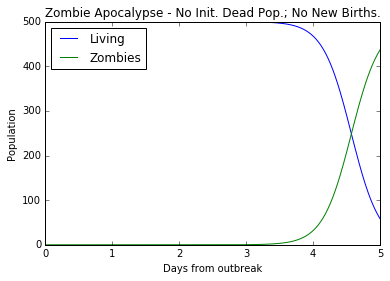

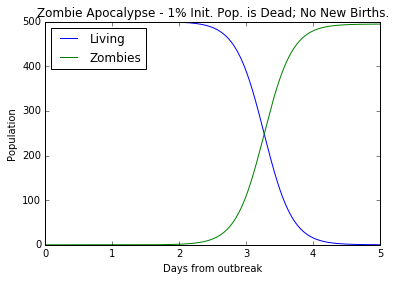

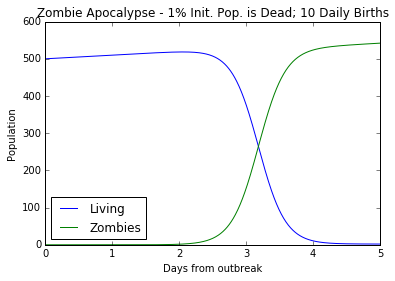

In [13]:
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()

P = 0       # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
        Si = y[0]
        Zi = y[1]
        Ri = y[2]
        # the model equations (see Munz et al. 2009)
        f0 = P - B*Si*Zi - d*Si
        f1 = B*Si*Zi + G*Ri - A*Si*Zi
        f2 = d*Si - G*Ri + A*Si*Zi
        return [f0, f1, f2]

# initial conditions
S0 = 500.               # initial population
Z0 = 0                  # initial zombie population
R0 = 0                  # initial death population
y0 = [S0, Z0, R0]       # initial condition vector
t  = np.linspace(0, 5., 1000)   # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)